# KNN - insurance data 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Load dataset

In [7]:
data=pd.read_csv('data/insurance_data.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### Data preprocessing

In [9]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
dtype: bool

In [10]:
data.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [11]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.dtypes

age                 int64
bought_insurance    int64
dtype: object

In [13]:
data.shape

(26, 2)

In [14]:
data.size

52

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               26 non-null     int64
 1   bought_insurance  26 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


### Correlation Analysis


Correlation Matrix:


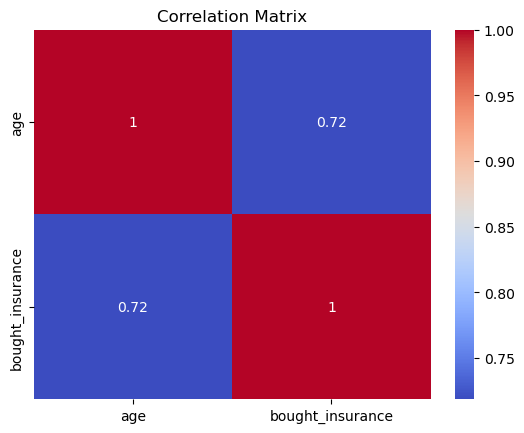

In [17]:
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Visualization

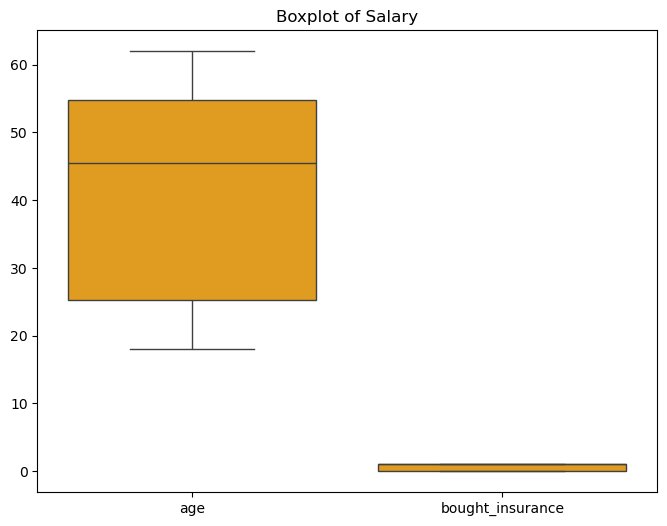

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data, color='orange')
plt.title("Boxplot of Salary")
plt.show()

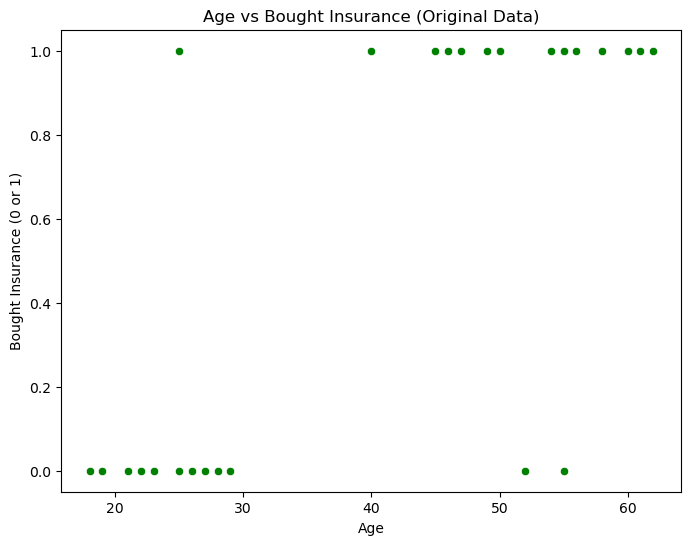

In [20]:
# Scatter plot for Age vs Bought Insurance (Original Data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bought_insurance', data=data, color="green")
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0 or 1)")
plt.title("Age vs Bought Insurance (Original Data)")
plt.show()

### Splitting the Data into Features (X) and Target (Y)

In [22]:
X = data[['age']]  # Features
y = data['bought_insurance']  # Target

### Splitting the data into Training and Testing Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 83.33


In [69]:
#END